In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from ase.build import bulk, fcc111

In [4]:
from ase.optimize import BFGS, FIRE
from ase.filters import FrechetCellFilter

In [5]:
from ase.visualize import view

In [6]:
element='Au'

# GPU: Tensorpotential calculator

In [7]:
from tensorpotential.calculator import TPCalculator

[tensorpotential] Info: Environment variable TF_USE_LEGACY_KERAS is automatically set to '1'.


2026-02-23 18:42:46.055635: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-23 18:42:46.067773: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1771868566.082009 3076500 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771868566.086175 3076500 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1771868566.096969 3076500 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [8]:
calc_tp = TPCalculator("../1-fit/seed/1/final_model/")

2026-02-23 18:42:52.970648: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1771868572.970763 3076500 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7705 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:b3:00.0, compute capability: 8.6


### FCC bulk

In [9]:
fcc_bulk = bulk(element,"fcc")
fcc_bulk

Atoms(symbols='Au', pbc=True, cell=[[0.0, 2.04, 2.04], [2.04, 0.0, 2.04], [2.04, 2.04, 0.0]])

In [10]:
fcc_bulk.calc=calc_tp

In [11]:
fcc_bulk.get_potential_energy()

I0000 00:00:1771868574.099987 3076500 service.cc:152] XLA service 0x55eb0dfe8ed0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1771868574.100009 3076500 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2026-02-23 18:42:54.390382: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1771868574.885847 3076500 cuda_dnn.cc:529] Loaded cuDNN version 90300
2026-02-23 18:43:02.874012: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'loop_negate_fusion', 2716 bytes spill stores, 2580 bytes spill loads
ptxas warning : Registers are spilled to local memory in function '__cuda_sm20_div_f64_slowpath_v2', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1771868582.929579 3076500 device_com

-3.928190024859274

In [12]:
fcc_bulk.get_stress()

array([-7.36742541e-03, -7.36742541e-03, -7.36742541e-03, -1.47120181e-17,
        1.30773494e-17,  1.14426807e-17])

In [14]:
FIRE(FrechetCellFilter(fcc_bulk)).run()

      Step     Time          Energy          fmax
FIRE:    0 18:43:04       -3.928190        0.125094
FIRE:    1 18:43:04       -3.928550        0.066666
FIRE:    2 18:43:04       -3.928680        0.020987


True

### FCC(111) surface

In [15]:
fcc_111_surface = fcc111(element, size=(2,2,10), periodic=True, vacuum=10)
fcc_111_surface

Atoms(symbols='Au40', pbc=True, cell=[[5.769991334482229, 0.0, 0.0], [2.8849956672411143, 4.996959075277683, 0.0], [0.0, 0.0, 41.20030188464305]], tags=...)

In [16]:
# view(Ir_surface)

In [17]:
fcc_111_surface.calc=calc_tp

In [18]:
fcc_111_surface.get_potential_energy()

-151.91916653256112

In [19]:
BFGS(FrechetCellFilter(fcc_111_surface)).run()

      Step     Time          Energy          fmax
BFGS:    0 18:43:27     -151.919167        0.132201
BFGS:    1 18:43:27     -151.920005        0.129830
BFGS:    2 18:43:27     -151.930969        0.074260


/fscratch/conda/tp2/lib/python3.10/site-packages/ase/filters.py:606: RuntimeWarning: logm result may be inaccurate, approximate err = 2.708253924029755e-13
  pos[natoms:] = self.logm(pos[natoms:]) * self.exp_cell_factor
/fscratch/conda/tp2/lib/python3.10/site-packages/ase/filters.py:606: RuntimeWarning: logm result may be inaccurate, approximate err = 2.7009130392160447e-13
  pos[natoms:] = self.logm(pos[natoms:]) * self.exp_cell_factor
/fscratch/conda/tp2/lib/python3.10/site-packages/ase/filters.py:606: RuntimeWarning: logm result may be inaccurate, approximate err = 2.736436138728923e-13
  pos[natoms:] = self.logm(pos[natoms:]) * self.exp_cell_factor


BFGS:    3 18:43:27     -151.931917        0.067231
BFGS:    4 18:43:27     -151.936290        0.073748
BFGS:    5 18:43:27     -151.939268        0.075333


/fscratch/conda/tp2/lib/python3.10/site-packages/ase/filters.py:606: RuntimeWarning: logm result may be inaccurate, approximate err = 2.6877010249175925e-13
  pos[natoms:] = self.logm(pos[natoms:]) * self.exp_cell_factor
/fscratch/conda/tp2/lib/python3.10/site-packages/ase/filters.py:606: RuntimeWarning: logm result may be inaccurate, approximate err = 2.7325232868022505e-13
  pos[natoms:] = self.logm(pos[natoms:]) * self.exp_cell_factor
/fscratch/conda/tp2/lib/python3.10/site-packages/ase/filters.py:606: RuntimeWarning: logm result may be inaccurate, approximate err = 2.704357084937528e-13
  pos[natoms:] = self.logm(pos[natoms:]) * self.exp_cell_factor


BFGS:    6 18:43:27     -151.942141        0.077683
BFGS:    7 18:43:27     -151.944283        0.088551


/fscratch/conda/tp2/lib/python3.10/site-packages/ase/filters.py:606: RuntimeWarning: logm result may be inaccurate, approximate err = 2.7114870095181677e-13
  pos[natoms:] = self.logm(pos[natoms:]) * self.exp_cell_factor
/fscratch/conda/tp2/lib/python3.10/site-packages/ase/filters.py:606: RuntimeWarning: logm result may be inaccurate, approximate err = 2.731637981242706e-13
  pos[natoms:] = self.logm(pos[natoms:]) * self.exp_cell_factor


BFGS:    8 18:43:28     -151.946906        0.084246
BFGS:    9 18:43:28     -151.950253        0.061808
BFGS:   10 18:43:28     -151.953768        0.070845


/fscratch/conda/tp2/lib/python3.10/site-packages/ase/filters.py:606: RuntimeWarning: logm result may be inaccurate, approximate err = 2.6766385817254793e-13
  pos[natoms:] = self.logm(pos[natoms:]) * self.exp_cell_factor
/fscratch/conda/tp2/lib/python3.10/site-packages/ase/filters.py:606: RuntimeWarning: logm result may be inaccurate, approximate err = 2.7014087503489643e-13
  pos[natoms:] = self.logm(pos[natoms:]) * self.exp_cell_factor
/fscratch/conda/tp2/lib/python3.10/site-packages/ase/filters.py:606: RuntimeWarning: logm result may be inaccurate, approximate err = 2.746655706682373e-13
  pos[natoms:] = self.logm(pos[natoms:]) * self.exp_cell_factor


BFGS:   11 18:43:28     -151.956414        0.068506
BFGS:   12 18:43:28     -151.958367        0.052450
BFGS:   13 18:43:28     -151.960088        0.035464


/fscratch/conda/tp2/lib/python3.10/site-packages/ase/filters.py:606: RuntimeWarning: logm result may be inaccurate, approximate err = 2.7412280622411103e-13
  pos[natoms:] = self.logm(pos[natoms:]) * self.exp_cell_factor


True

Some initial slowdown during the first few steps is due to JIT recompilation of the model, triggered by changes in the number of neighbors. However, thanks to padding, recompilations will only occur when a new padding size is required.

You can adjust these padding settings with the following options (at the cost of slightly increased overhead):

```python
calc_tp_with_more_padding = TPCalculator("../1-fit/seed/1/saved_model/",
                                         pad_neighbors_fraction=0.2, # pad up to 20% extra neighbours
                                         pad_atoms_number=5 # pad up to 5 extra atoms
                                        )
```

# CPU: GRACE/FS calculator (with extrapolation grade)

In [20]:
from pyace.asecalc import PyGRACEFSCalculator

/fscratch/conda/tp2/lib/python3.10/site-packages/pyace/multispecies_basisextension.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [21]:
calc_fs=PyGRACEFSCalculator("../1-fit/seed/1/saved_model.yaml")

### FCC bulk

In [22]:
fcc_bulk = bulk(element,"fcc")
fcc_bulk

Atoms(symbols='Au', pbc=True, cell=[[0.0, 2.04, 2.04], [2.04, 0.0, 2.04], [2.04, 2.04, 0.0]])

In [23]:
fcc_bulk.calc=calc_fs

In [24]:
fcc_bulk.get_potential_energy()

-3.928190024857455

In [25]:
fcc_bulk.get_stress()

array([-7.36742543e-03, -7.36742543e-03, -7.36742543e-03, -1.73683547e-18,
       -1.02166792e-19, -6.52305845e-18])

In [27]:
FIRE(FrechetCellFilter(fcc_bulk)).run()

      Step     Time          Energy          fmax
FIRE:    0 18:43:48       -3.928190        0.125094
FIRE:    1 18:43:48       -3.928550        0.066666
FIRE:    2 18:43:48       -3.928680        0.020987


True

### FCC(111) surface

In [28]:
fcc_111_surface = fcc111(element, size=(2,2,10), periodic=True, vacuum=10)
fcc_111_surface

Atoms(symbols='Au40', pbc=True, cell=[[5.769991334482229, 0.0, 0.0], [2.8849956672411143, 4.996959075277683, 0.0], [0.0, 0.0, 41.20030188464305]], tags=...)

In [29]:
fcc_111_surface.calc=calc_fs

In [30]:
fcc_111_surface.get_potential_energy()

-151.91916653406304

In [32]:
BFGS(FrechetCellFilter(fcc_111_surface)).run()

      Step     Time          Energy          fmax
BFGS:    0 18:44:02     -151.919167        0.132201
BFGS:    1 18:44:02     -151.920005        0.129830
BFGS:    2 18:44:02     -151.930969        0.074260
BFGS:    3 18:44:02     -151.931917        0.067231
BFGS:    4 18:44:02     -151.936290        0.073748


/fscratch/conda/tp2/lib/python3.10/site-packages/ase/filters.py:606: RuntimeWarning: logm result may be inaccurate, approximate err = 2.7622479054685965e-13
  pos[natoms:] = self.logm(pos[natoms:]) * self.exp_cell_factor
/fscratch/conda/tp2/lib/python3.10/site-packages/ase/filters.py:606: RuntimeWarning: logm result may be inaccurate, approximate err = 2.696227861078045e-13
  pos[natoms:] = self.logm(pos[natoms:]) * self.exp_cell_factor
/fscratch/conda/tp2/lib/python3.10/site-packages/ase/filters.py:606: RuntimeWarning: logm result may be inaccurate, approximate err = 2.7210206183892113e-13
  pos[natoms:] = self.logm(pos[natoms:]) * self.exp_cell_factor
/fscratch/conda/tp2/lib/python3.10/site-packages/ase/filters.py:606: RuntimeWarning: logm result may be inaccurate, approximate err = 2.7291457476505886e-13
  pos[natoms:] = self.logm(pos[natoms:]) * self.exp_cell_factor
/fscratch/conda/tp2/lib/python3.10/site-packages/ase/filters.py:606: RuntimeWarning: logm result may be inaccurate, a

BFGS:    5 18:44:02     -151.939268        0.075333
BFGS:    6 18:44:02     -151.942141        0.077683
BFGS:    7 18:44:02     -151.944283        0.088551
BFGS:    8 18:44:02     -151.946906        0.084246


/fscratch/conda/tp2/lib/python3.10/site-packages/ase/filters.py:606: RuntimeWarning: logm result may be inaccurate, approximate err = 2.710513797441046e-13
  pos[natoms:] = self.logm(pos[natoms:]) * self.exp_cell_factor
/fscratch/conda/tp2/lib/python3.10/site-packages/ase/filters.py:606: RuntimeWarning: logm result may be inaccurate, approximate err = 2.7093278075836954e-13
  pos[natoms:] = self.logm(pos[natoms:]) * self.exp_cell_factor
/fscratch/conda/tp2/lib/python3.10/site-packages/ase/filters.py:606: RuntimeWarning: logm result may be inaccurate, approximate err = 2.7234170907949665e-13
  pos[natoms:] = self.logm(pos[natoms:]) * self.exp_cell_factor


BFGS:    9 18:44:02     -151.950253        0.061808
BFGS:   10 18:44:02     -151.953768        0.070845
BFGS:   11 18:44:02     -151.956414        0.068506
BFGS:   12 18:44:02     -151.958367        0.052450
BFGS:   13 18:44:02     -151.960088        0.035464


/fscratch/conda/tp2/lib/python3.10/site-packages/ase/filters.py:606: RuntimeWarning: logm result may be inaccurate, approximate err = 2.7287508047114133e-13
  pos[natoms:] = self.logm(pos[natoms:]) * self.exp_cell_factor
/fscratch/conda/tp2/lib/python3.10/site-packages/ase/filters.py:606: RuntimeWarning: logm result may be inaccurate, approximate err = 2.7264041983223555e-13
  pos[natoms:] = self.logm(pos[natoms:]) * self.exp_cell_factor
/fscratch/conda/tp2/lib/python3.10/site-packages/ase/filters.py:606: RuntimeWarning: logm result may be inaccurate, approximate err = 2.7585201164074057e-13
  pos[natoms:] = self.logm(pos[natoms:]) * self.exp_cell_factor
/fscratch/conda/tp2/lib/python3.10/site-packages/ase/filters.py:606: RuntimeWarning: logm result may be inaccurate, approximate err = 2.7786218601640234e-13
  pos[natoms:] = self.logm(pos[natoms:]) * self.exp_cell_factor


True

## Extrapolation grade gamma

one need to set active set (ASI), computed previously with `pace_activeset` utility

In [33]:
calc_fs.set_active_set("../1-fit/seed/1/saved_model.asi")

### FCC

In [34]:
fcc_bulk.calc=calc_fs

In [35]:
fcc_bulk.get_potential_energy()

-3.9286798320798546

In [36]:
fcc_bulk.calc.results['gamma']

array([0.69626783])

bulk atoms are in interpolation regime ($\gamma<\approx1$)

Let us consider E-lattice constant curve with extrapolation grade

In [37]:
a_list=np.linspace(1.0, 8, num=75)

energy_list=[]
gamma_list=[]

for a in a_list:
    at = bulk(element,"fcc",a=a)
    at.calc=calc_fs
    
    e=at.get_potential_energy()
    gamma=at.calc.results['gamma'].max()
    
    energy_list.append(e)
    gamma_list.append(gamma)

In [38]:
gamma_list=np.array(gamma_list)

energy_list=np.array(energy_list)

mask = gamma_list<=1.1 # interpolation region

Text(0, 0.5, 'Gamma')

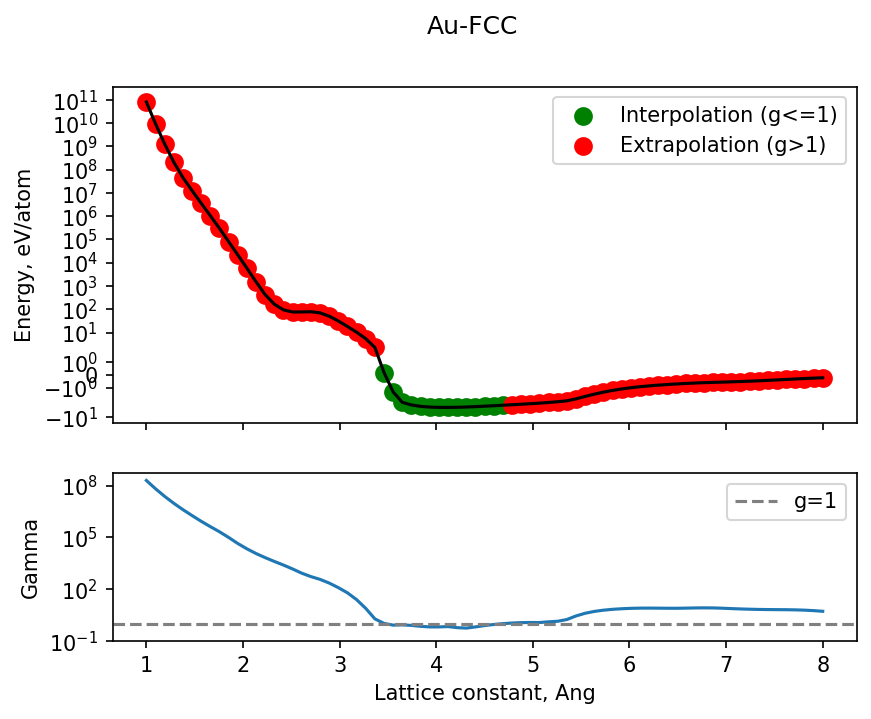

In [39]:
fig, axs= plt.subplots(nrows=2, ncols=1, sharex=True, height_ratios = [2,1], dpi=150)

fig.suptitle(element+"-FCC")
#### energy ###
axs[0].plot(a_list, energy_list, color='black')
axs[0].scatter(a_list[mask], energy_list[mask], lw=3, color="green", label='Interpolation (g<=1)')
axs[0].scatter(a_list[~mask], energy_list[~mask], lw=3, color="red", label='Extrapolation (g>1)')

axs[0].legend()
axs[0].set_yscale('symlog')
axs[0].set_ylabel("Energy, eV/atom")

#### gamma ###
axs[1].plot(a_list, gamma_list)
axs[1].set_yscale('log');
axs[1].set_xlabel("Lattice constant, Ang")


axs[1].axhline(1.0, ls='--', color='gray', label='g=1')
axs[1].legend()
axs[1].set_ylim(0.1, None)
axs[1].set_ylabel("Gamma")

### FCC(111) surface

In [40]:
fcc_111_surface.calc=calc_fs

In [41]:
fcc_111_surface.get_potential_energy()

-151.96008778862355

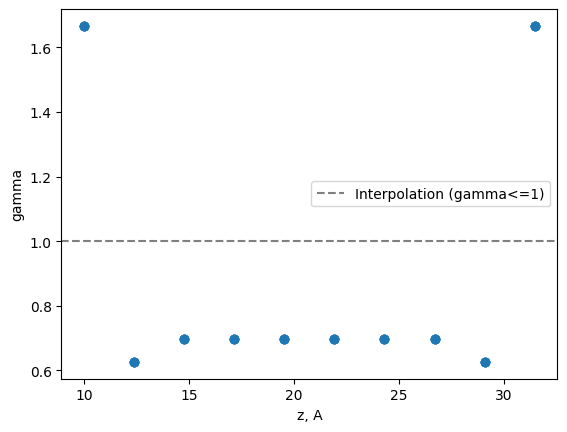

In [42]:
plt.scatter(fcc_111_surface.positions[:,2], calc_fs.results['gamma'])
plt.xlabel("z, A")
plt.ylabel("gamma")
plt.axhline(1.0, ls="--", color='gray', label='Interpolation (gamma<=1)')
plt.legend()

Since our training dataset for this particular tutorial contains only bulk-like structures, surface atoms are in extrapolation regime ($\gamma>1$), bulk atoms are in interpolation regime ($\gamma<=1$)